In [6]:
!nvidia-smi

Mon Sep 30 12:15:01 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.09                 Driver Version: 561.09         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P0             16W /   50W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
#import libraries 

import os
import torch 
import torchinfo
import torch.nn as nn  
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader 

device = " Running on GTX 1650 " if torch.cuda.is_available() else "Running on CPU"
print(device)

 Running on GTX 1650 


In [9]:
#Loading the data (CIFAR10)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Setup transform to preprocess images
transform = transforms.Compose(
    [transforms.ToTensor(),
     # Normalize to 0.5 mean and 0.5 std across all 3 colour channels of images
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])


# Load training data
train_data = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE,
                              shuffle=True, num_workers=NUM_WORKERS)

# Load testing data
test_data = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
class_names = test_data.classes
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


[48480]
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])


Text(0.5, 1.0, 'bird')

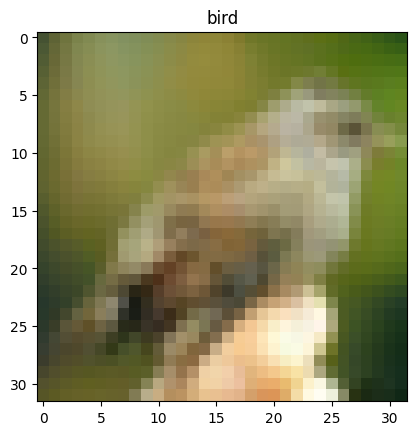

In [21]:
#display random image 

import random 
import matplotlib.pyplot as plt 

random_idx = random.sample(list(range(len(train_data))),k=1)
print(random_idx) 

image,label = train_data[random_idx[0]]
print(image.shape)

# (3, 32, 32) -> (32, 32, 3) & unormalize
image = image.permute(1,2,0) / 2 + 0.5   
print(image.shape) 
plt.imshow(image)
plt.title(class_names[label])

Build the model 

Replicating the ResNet50 model paper: https://arxiv.org/pdf/1512.03385.pdf 

Other sources: https://pytorch.org/vision/main/_modules/torchvision/models/resnet.html#ResNet50_Weights 